# Student Performance

**By:** Juan Bernardo Benavides Rubio

---

Starting in this world of machine learning, the best aproach you can take to learning is by developing projects. This is the first in a series of 4 basic projects in which I'll study the basics of machine learning with some of the most simple models out there. However, I'll try to outline clearly the steps and explain my thoughts in order to get my ideas clear and, hopefully, help somebody else in this process of learning Machine Learning.

First let's import the basic libraries we'll have as default. I won't import sklearn here, but I'll go importing whatever I need throughout the process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The problem

The first step when doing Machine learning is to understand the problem that you want to solve. In this case, a school is telling us that they would like to understand why are their students doing bad in math. Is it possible to understand this with time and be able to help those in most risk of failing?

## The data

The second step has to do with data which is divided in 3 substeps:

1. Collecting
2. Cleaning 
3. Selecting

Every ML model needs lots of data to be trained. Unfortunately, this is not always an easy task because sometimes you'll need to collect this data yourself or spend lot's of time looking for useful data. Once you get this data, it is probably not well suited for using it in the model, you may have missing or incorrect data and therefore, you need to process it and clean it. Finally, once you have the data cleaned and in the correct format for training you need to select which data is really useful for your model, most of it will not be useful. This last step can also depend on the model you select.

In this case we'll use data found [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

Let's explore the data a little.

In [2]:
data = pd.read_csv('data/student-mat.csv', sep=';')
display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


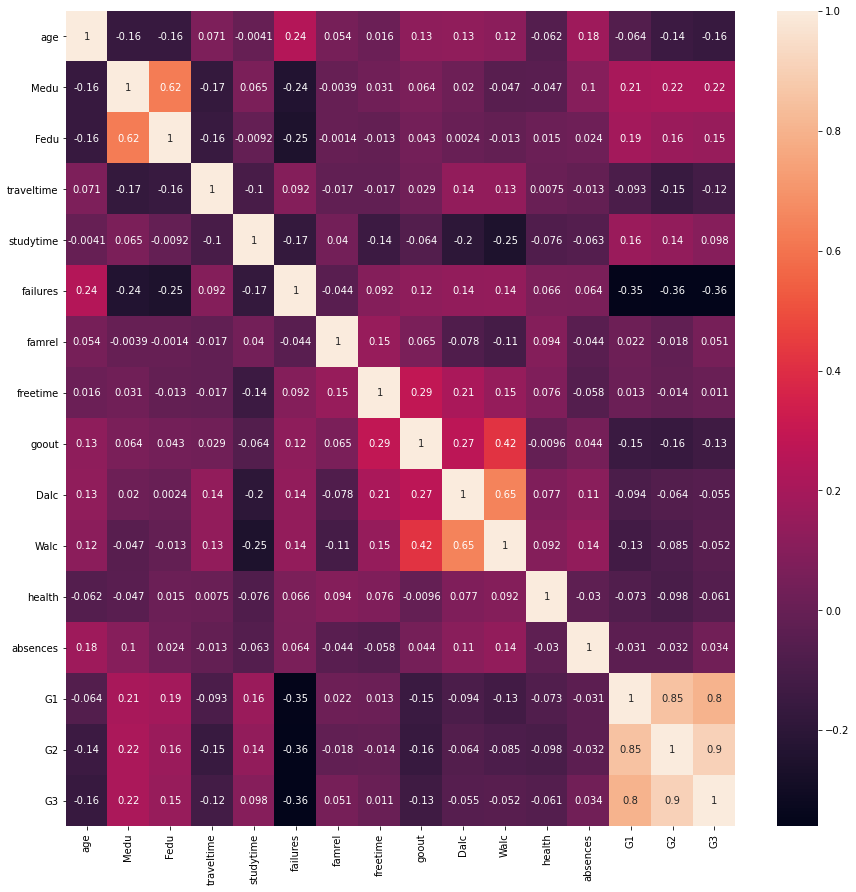

In [5]:
corr= data.corr()

_ = plt.figure(figsize=(15, 15))
_ = sns.heatmap(corr, annot=True)


In [6]:
attr = ['Medu', 'Fedu', 'traveltime','studytime', 'failures', 'goout', 'G1', 'G2']
target = 'G3'

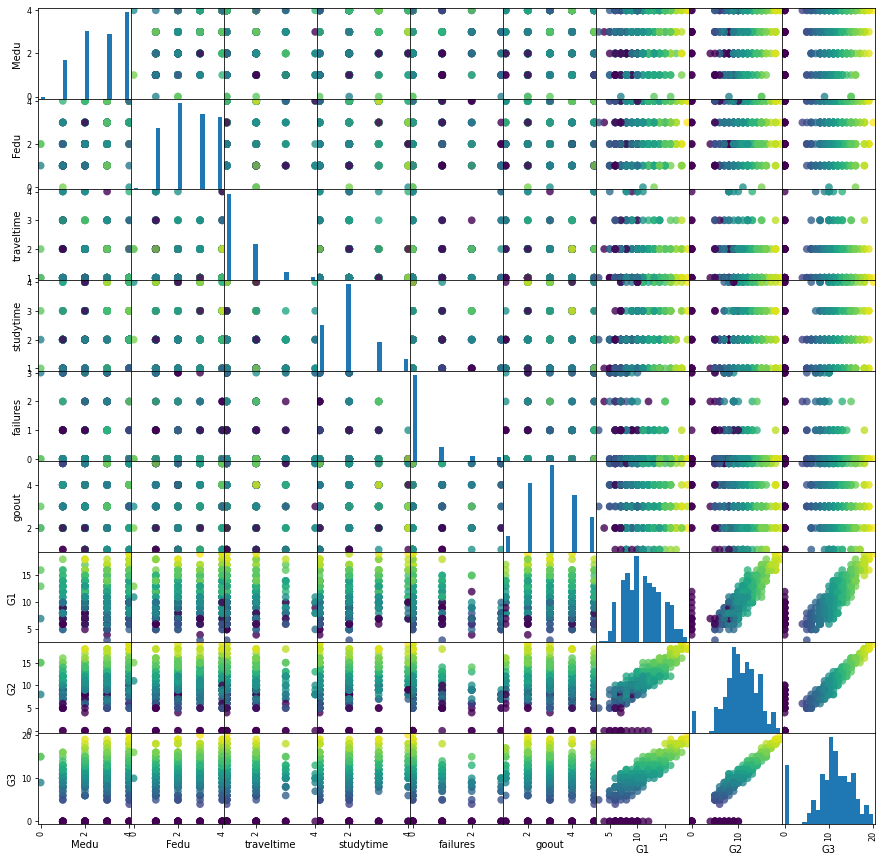

In [7]:
_ = pd.plotting.scatter_matrix(data[attr + [target]], figsize=(15, 15), c=data[target], marker='o',
                            hist_kwds={'bins': 20}, s=60, alpha=.8)

In [8]:
X = np.array(data[attr])
y = np.array(data[target])

In [9]:
X.shape, y.shape

((395, 8), (395,))

## Pick a model

The first thing we notice is that although the target variable is not continuous, it is part of a specific range of numbers that can be modeled as a continuous spectrum and is a great candidate for a regression. Additionally, we can notice that there is some correlation that can be exploited into a linear model, specially for the relation with the grades of the first couple of periods. 

We are going to try a linear regression. It is basically a linear fit of the data that determines a 'slope' coefficient for each of the features and an intercept. 

## Train the model

The process of training a model is pretty simple. It basically consists of looking for the model in the scikit-learn API, then importing it and using it. This library uses an object oriented aproach so every model is a class and we must instantiate it and set the hyperparameters needed for the model (in this case this doesn't matter). Finally you use the fit method and pass it the data as an argument to it. 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Instantiate the method
linear = LinearRegression()

#fit the method.
linear.fit(X, y)

LinearRegression()

In [27]:
X[321].reshape(1, -1)

array([[ 2,  2,  1,  2,  0,  2, 11,  9]])

In [28]:
linear.predict(X[321].reshape(1, -1))

array([8.69141897])

In [29]:
y[321]

9

In [30]:
np.column_stack((np.round(linear.predict(X)), y))

array([[ 5.,  6.],
       [ 4.,  6.],
       [ 6., 10.],
       [14., 15.],
       [ 9., 10.],
       [15., 15.],
       [12., 11.],
       [ 4.,  6.],
       [18., 19.],
       [15., 15.],
       [ 8.,  9.],
       [12., 12.],
       [14., 14.],
       [10., 11.],
       [16., 16.],
       [14., 14.],
       [14., 14.],
       [ 9., 10.],
       [ 4.,  5.],
       [10., 10.],
       [14., 15.],
       [15., 15.],
       [15., 16.],
       [13., 12.],
       [ 8.,  8.],
       [ 8.,  8.],
       [12., 11.],
       [17., 15.],
       [11., 11.],
       [12., 11.],
       [10., 12.],
       [17., 17.],
       [17., 16.],
       [ 9., 12.],
       [14., 15.],
       [ 6.,  6.],
       [16., 18.],
       [16., 15.],
       [11., 11.],
       [13., 13.],
       [ 9., 11.],
       [12., 12.],
       [19., 18.],
       [ 7., 11.],
       [ 9.,  9.],
       [ 7.,  6.],
       [12., 11.],
       [19., 20.],
       [16., 14.],
       [ 6.,  7.],
       [13., 13.],
       [13., 13.],
       [11.,

In [31]:
linear.score(X, y)

0.8260575435129992

In [32]:
linear.coef_

array([ 0.14818468, -0.13732329,  0.11195923, -0.20024519, -0.27936414,
        0.06516732,  0.15175101,  0.97798804])

In [33]:
linear.intercept_

-1.6432608541653675

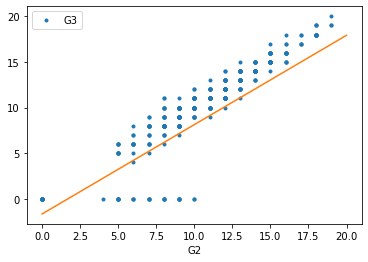

In [44]:
g2 = np.linspace(0, 20, 1000)
g3 = linear.coef_[-1] * g2 + linear.intercept_


_ = data.plot(x='G2', y='G3', marker='.', linestyle='none')
_ = plt.plot(g2, g3)

This is the basics of creating a model. The workflow is pretty much the same for most models. However, this model has a big problem. We can tell that the model works correctly with our data, but we have no idea if it works correctly with new data it has never seen before and that is basically the idea of machine learning. At the moment we could have a model that works great with this data but is overfitted to it and will have a terrible performance with unseen data.

How is it possible to test this? Testing the model with new data that is also labeled. But we saw that obtaining new data can be very difficult. Therefore, before training a model we should leave some of the samples apart for testing purposes. Scikit-learn makes this very easy:

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((355, 8), (355,), (40, 8), (40,))

With this test data apart we can now repeat the previous process using only the training data and then test it with the test data:

In [56]:
linear = LinearRegression()

linear.fit(X_train, y_train)

np.column_stack((np.round(linear.predict(X_test)), y_test))

array([[ 6., 10.],
       [12., 12.],
       [ 3.,  5.],
       [ 9., 10.],
       [ 8.,  9.],
       [13., 13.],
       [19., 18.],
       [ 7.,  6.],
       [ 8.,  0.],
       [13., 14.],
       [15., 15.],
       [ 6.,  7.],
       [14., 15.],
       [12., 10.],
       [15., 14.],
       [ 8.,  8.],
       [ 6.,  8.],
       [11., 11.],
       [15., 15.],
       [ 9.,  0.],
       [14., 14.],
       [17., 16.],
       [15., 16.],
       [ 5.,  6.],
       [ 8.,  0.],
       [20., 19.],
       [11., 11.],
       [ 9., 12.],
       [17., 17.],
       [11., 10.],
       [ 8.,  8.],
       [ 8., 10.],
       [15., 15.],
       [13., 13.],
       [ 6.,  8.],
       [ 4.,  5.],
       [-2.,  0.],
       [15., 15.],
       [12., 14.],
       [ 7.,  8.]])

In [57]:
linear.score(X_test, y_test)

0.7332020611866671

In [62]:
best = 0
for _ in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    score = linear.score(X_test, y_test)
    
    if score > best:
        best = score

best

0.8367752444649097

### Cross-validation

A better statistical method for getting a good measure for the performance is by using a method called cross validation. The idea is to get the score with different sets of data and then take the average of all these scores. This result gives a better idea of how will the model perform. Have in mind that it can be computationally expensive.


In [64]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(linear, X, y, cv=5)
scores

array([0.84977117, 0.89394732, 0.82499842, 0.7607492 , 0.70234172])

In [76]:
print(f"With cross-validation we obtained a performance of {scores.mean()} +/- {scores.std()}")

With cross-validation we obtained a performance of 0.8063615663503436 +/- 0.06753311261366635


Now, this function is just a measure of the performance, it doesn't actually gives a trained model, so let's do it now. Cross validation is just a tool for getting a better score that is less dependent on a specific way of splitting the data. It will become more useful in models that use different hyperparameters that need to be tuned.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

linear.fit(X_train, y_train)

linear.score(X_test, y_test)

0.809590123254591

Finally, training models can become computationally expensive really fast. When using larger data sets and more complex models, training the model can be a long time and it wouldn't be nice to train it each time you're going to use it. Thankfully, python comes with a tool called pickle that allow us to save the trained model in a file that can be later imported and used directly to predict new data.

In [78]:
import pickle

In [79]:
with open("finalgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

We can do the little trick again for saving the best possible model.

In [81]:
best = 0
for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    scores = cross_val_score(linear, X_train, y_train)
    
    if scores.mean() > best:
        with open("finalgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
        best = linear.score(X_test, y_test)

best

0.809590123254591

This model can then be opened again and used directly. Let's save it in a new variable.

In [83]:
with open("finalgrades.pickle", 'rb') as f:
    lin_pickle = pickle.load(f)

In [84]:
lin_pickle.score(X_test, y_test)

0.809590123254591

This is all for now, let's continue with a classification problem.